In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [35]:
df_25 = pd.read_csv('./vrp_result_25x25_30_20231204.csv')
df_25.head()

,id,map_size,num_nodes,num_locations,num_vehicles,vehicle_capacities,type,truck_routes,drone_routes,robot_routes,distances,time,waiting,total_distance,travel_time,time_complexity,space_complexity
0,1,"(25, 25)",100,"[(12.5, 12.5), (19.21, 4.37), (8.88, 9.75), (9...",1,[100],VRP,"[[0, 73, 34, 86, 2, 27, 3, 92, 82, 54, 66, 10,...",NaN,NaN,[196],396.0,[0],196,396.0,3.1291,3.2285
1,1,"(25, 25)",100,"[(12.5, 12.5), (19.21, 4.37), (8.88, 9.75), (9...",1,[100],VRPD,"[[0, 73, 34, 86, 2, 27, 3, 92, 54, 66, 10, 56,...","[[[80, 79, 84], [91, 16, 46], [49, 41, 44], [3...",NaN,[184],359.0,[7.0],184,359.0,3.0410,5.8848
2,1,"(25, 25)",100,"[(12.5, 12.5), (19.21, 4.37), (8.88, 9.75), (9...",1,[100],VRPR,"[[0, 73, 34, 86, 2, 27, 3, 92, 82, 54, 42, 40,...",NaN,"[[[54, 66, 10, 56, 31, 50], [41, 39, 90, 8, 19...",[229],373.0,[0.0],229,373.0,3.0898,14.7900
3,1,"(25, 25)",100,"[(12.5, 12.5), (19.21, 4.37), (8.88, 9.75), (9...",1,[100],VRPRD,"[[0, 73, 34, 86, 2, 27, 3, 92, 82, 54, 42, 40,...","[[[80, 79, 84], [38, 76, 96], [69, 22, 35], [7...","[[[54, 66, 10, 56, 31, 50], [41, 39, 90, 8, 19...",[202],353.0,[27],202,353.0,2.9549,10.4316
4,2,"(25, 25)",100,"[(12.5, 12.5), (5.35, 20.41), (24.11, 24.34), ...",1,[100],VRP,"[[0, 6, 70, 71, 73, 44, 80, 78, 77, 83, 22, 68...",NaN,NaN,[194],394.0,[0],194,394.0,3.6018,2.8262


In [37]:
df_25['drone_routes'][1]

'[[[80, 79, 84], [91, 16, 46], [49, 41, 44], [38, 76, 96], [48, 22, 35], [75, 77, 21], [87, 5, 80], [40, 32, 14], [53, 12, 20], [74, 11, 94], [94, 81, 7], [33, 62, 47], [92, 82, 54], [69, 72, 48], [59, 23, 17], [68, 89, 78]]]'

<AxesSubplot: xlabel='id', ylabel='travel_time'>

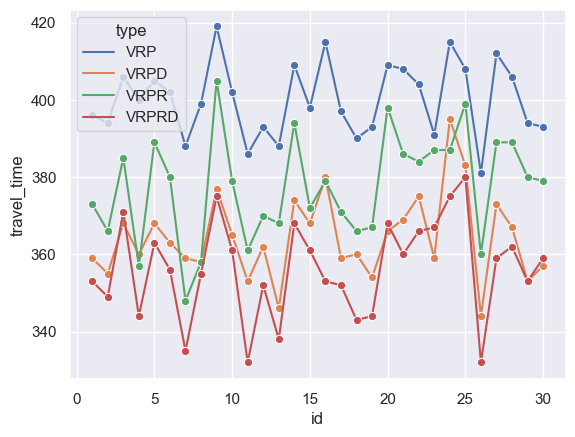

In [12]:
sns.lineplot(data=df_25, x='id', y='travel_time', hue='type', marker='o')